In [61]:
# this block will load the housing data as we did before


import os
import tarfile
from six.moves import urllib
import numpy as np

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

fetch_housing_data()
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


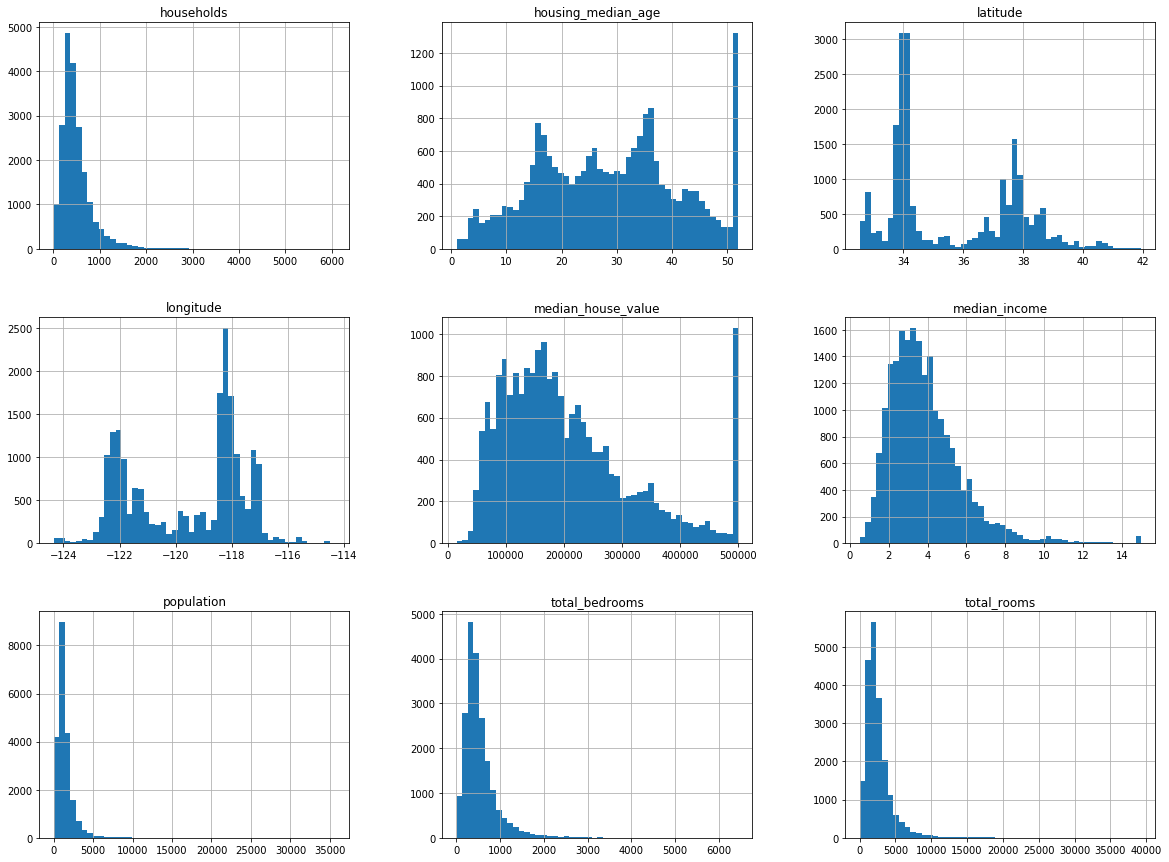

In [62]:
# here are some visualizations of the data that are in this dataset

import matplotlib.pyplot as plt
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41969ad5f8>,
      dtype=object)

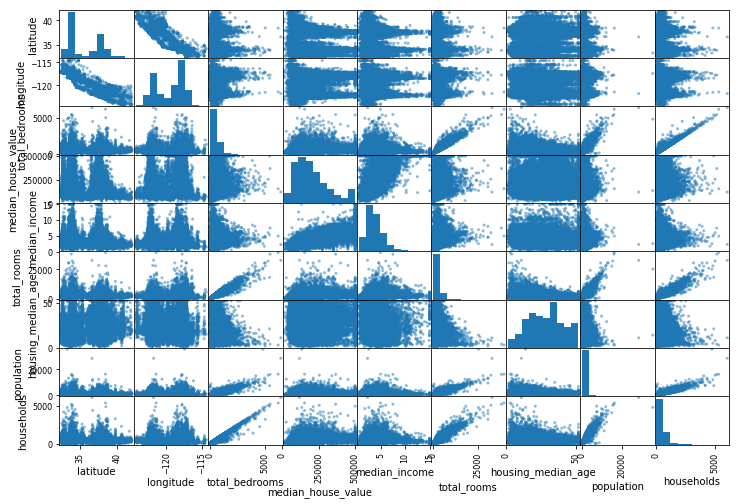

In [63]:
# some more code for visualizing the relationships between two attributes in the dataset

# if you want bigger figures, create another cell below this block with fewer attributes selected

from pandas.plotting import scatter_matrix

attributes = ["latitude", "longitude", "total_bedrooms", "median_house_value", "median_income", "total_rooms",
              "housing_median_age", "population", "households" ]
scatter_matrix(housing[attributes], figsize=(12, 8))


In [64]:
#now let's try pulling out some items in the dataset (for this, I'll look at proximity to the bay as the output and median income as the input)

X = np.array(housing["longitude"]).reshape(-1,1)
yval = np.array(housing["median_house_value"])
y = ( yval > 200000 ).astype(np.int)

print(yval, y)

print( X.shape, y.shape )

[452600. 358500. 352100. ...  92300.  84700.  89400.] [1 1 1 ... 0 0 0]
(20640, 1) (20640,)


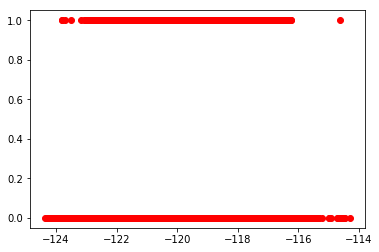

In [65]:
# we can look at this as logistic data (1 or 0)

import matplotlib.pyplot as plt
plt.plot( X, y, 'ro')

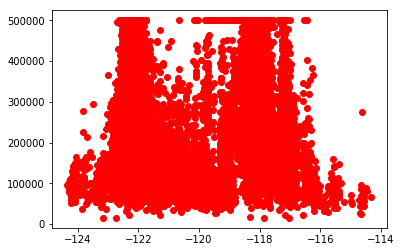

In [66]:
# or, we can look at this as linear data

import matplotlib.pyplot as plt
plt.plot( X, yval, 'ro')

In [67]:
# let's try some logistic regression on the data

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

[[0.50108217 0.49891783]
 [0.50125837 0.49874163]
 [0.50143457 0.49856543]
 ...
 [0.66974469 0.33025531]
 [0.66990057 0.33009943]
 [0.67005641 0.32994359]]


Text(0.5, 0, 'longitude')

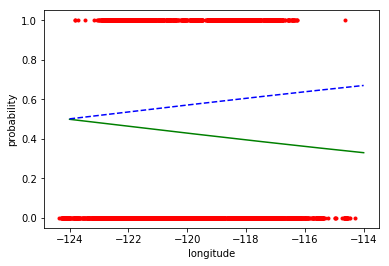

In [68]:
# you'll want to visualize the output of the logistic regression

# to create the curves, need to sample the space evenly
X_new = np.linspace(-124, -114, 1000).reshape(-1, 1) #make sure to update this to match the range of your xvariable
# predicted probabilities for each of the sampled papers
y_proba = log_reg.predict_proba(X_new)
print(y_proba)

# plot the data
plt.plot(X,y == 1,'r.')

#plot the curves
plt.plot(X_new, y_proba[:, 1], "g-")
plt.plot(X_new, y_proba[:, 0], "b--")
plt.ylabel('probability')
plt.xlabel('longitude')

point 0 of 20640
point 1 of 20640
point 2 of 20640
point 3 of 20640
point 4 of 20640
point 5 of 20640
point 6 of 20640
point 7 of 20640
point 8 of 20640
point 9 of 20640
point 10 of 20640
point 11 of 20640
point 12 of 20640
point 13 of 20640
point 14 of 20640
point 15 of 20640
point 16 of 20640
point 17 of 20640
point 18 of 20640
point 19 of 20640
point 20 of 20640
point 21 of 20640
point 22 of 20640
point 23 of 20640
point 24 of 20640
point 25 of 20640
point 26 of 20640
point 27 of 20640
point 28 of 20640
point 29 of 20640
point 30 of 20640
point 31 of 20640
point 32 of 20640
point 33 of 20640
point 34 of 20640
point 35 of 20640
point 36 of 20640
point 37 of 20640
point 38 of 20640
point 39 of 20640
point 40 of 20640
point 41 of 20640
point 42 of 20640
point 43 of 20640
point 44 of 20640
point 45 of 20640
point 46 of 20640
point 47 of 20640
point 48 of 20640
point 49 of 20640
point 50 of 20640
point 51 of 20640
point 52 of 20640
point 53 of 20640
point 54 of 20640
point 55 of 20640
po

point 519 of 20640
point 520 of 20640
point 521 of 20640
point 522 of 20640
point 523 of 20640
point 524 of 20640
point 525 of 20640
point 526 of 20640
point 527 of 20640
point 528 of 20640
point 529 of 20640
point 530 of 20640
point 531 of 20640
point 532 of 20640
point 533 of 20640
point 534 of 20640
point 535 of 20640
point 536 of 20640
point 537 of 20640
point 538 of 20640
point 539 of 20640
point 540 of 20640
point 541 of 20640
point 542 of 20640
point 543 of 20640
point 544 of 20640
point 545 of 20640
point 546 of 20640
point 547 of 20640
point 548 of 20640
point 549 of 20640
point 550 of 20640
point 551 of 20640
point 552 of 20640
point 553 of 20640
point 554 of 20640
point 555 of 20640
point 556 of 20640
point 557 of 20640
point 558 of 20640
point 559 of 20640
point 560 of 20640
point 561 of 20640
point 562 of 20640
point 563 of 20640
point 564 of 20640
point 565 of 20640
point 566 of 20640
point 567 of 20640
point 568 of 20640
point 569 of 20640
point 570 of 20640
point 571 of

point 969 of 20640
point 970 of 20640
point 971 of 20640
point 972 of 20640
point 973 of 20640
point 974 of 20640
point 975 of 20640
point 976 of 20640
point 977 of 20640
point 978 of 20640
point 979 of 20640
point 980 of 20640
point 981 of 20640
point 982 of 20640
point 983 of 20640
point 984 of 20640
point 985 of 20640
point 986 of 20640
point 987 of 20640
point 988 of 20640
point 989 of 20640
point 990 of 20640
point 991 of 20640
point 992 of 20640
point 993 of 20640
point 994 of 20640
point 995 of 20640
point 996 of 20640
point 997 of 20640
point 998 of 20640
point 999 of 20640
point 1000 of 20640
point 1001 of 20640
point 1002 of 20640
point 1003 of 20640
point 1004 of 20640
point 1005 of 20640
point 1006 of 20640
point 1007 of 20640
point 1008 of 20640
point 1009 of 20640
point 1010 of 20640
point 1011 of 20640
point 1012 of 20640
point 1013 of 20640
point 1014 of 20640
point 1015 of 20640
point 1016 of 20640
point 1017 of 20640
point 1018 of 20640
point 1019 of 20640
point 1020 

point 1391 of 20640
point 1392 of 20640
point 1393 of 20640
point 1394 of 20640
point 1395 of 20640
point 1396 of 20640
point 1397 of 20640
point 1398 of 20640
point 1399 of 20640
point 1400 of 20640
point 1401 of 20640
point 1402 of 20640
point 1403 of 20640
point 1404 of 20640
point 1405 of 20640
point 1406 of 20640
point 1407 of 20640
point 1408 of 20640
point 1409 of 20640
point 1410 of 20640
point 1411 of 20640
point 1412 of 20640
point 1413 of 20640
point 1414 of 20640
point 1415 of 20640
point 1416 of 20640
point 1417 of 20640
point 1418 of 20640
point 1419 of 20640
point 1420 of 20640
point 1421 of 20640
point 1422 of 20640
point 1423 of 20640
point 1424 of 20640
point 1425 of 20640
point 1426 of 20640
point 1427 of 20640
point 1428 of 20640
point 1429 of 20640
point 1430 of 20640
point 1431 of 20640
point 1432 of 20640
point 1433 of 20640
point 1434 of 20640
point 1435 of 20640
point 1436 of 20640
point 1437 of 20640
point 1438 of 20640
point 1439 of 20640
point 1440 of 20640


point 1817 of 20640
point 1818 of 20640
point 1819 of 20640
point 1820 of 20640
point 1821 of 20640
point 1822 of 20640
point 1823 of 20640
point 1824 of 20640
point 1825 of 20640
point 1826 of 20640
point 1827 of 20640
point 1828 of 20640
point 1829 of 20640
point 1830 of 20640
point 1831 of 20640
point 1832 of 20640
point 1833 of 20640
point 1834 of 20640
point 1835 of 20640
point 1836 of 20640
point 1837 of 20640
point 1838 of 20640
point 1839 of 20640
point 1840 of 20640
point 1841 of 20640
point 1842 of 20640
point 1843 of 20640
point 1844 of 20640
point 1845 of 20640
point 1846 of 20640
point 1847 of 20640
point 1848 of 20640
point 1849 of 20640
point 1850 of 20640
point 1851 of 20640
point 1852 of 20640
point 1853 of 20640
point 1854 of 20640
point 1855 of 20640
point 1856 of 20640
point 1857 of 20640
point 1858 of 20640
point 1859 of 20640
point 1860 of 20640
point 1861 of 20640
point 1862 of 20640
point 1863 of 20640
point 1864 of 20640
point 1865 of 20640
point 1866 of 20640


point 2240 of 20640
point 2241 of 20640
point 2242 of 20640
point 2243 of 20640
point 2244 of 20640
point 2245 of 20640
point 2246 of 20640
point 2247 of 20640
point 2248 of 20640
point 2249 of 20640
point 2250 of 20640
point 2251 of 20640
point 2252 of 20640
point 2253 of 20640
point 2254 of 20640
point 2255 of 20640
point 2256 of 20640
point 2257 of 20640
point 2258 of 20640
point 2259 of 20640
point 2260 of 20640
point 2261 of 20640
point 2262 of 20640
point 2263 of 20640
point 2264 of 20640
point 2265 of 20640
point 2266 of 20640
point 2267 of 20640
point 2268 of 20640
point 2269 of 20640
point 2270 of 20640
point 2271 of 20640
point 2272 of 20640
point 2273 of 20640
point 2274 of 20640
point 2275 of 20640
point 2276 of 20640
point 2277 of 20640
point 2278 of 20640
point 2279 of 20640
point 2280 of 20640
point 2281 of 20640
point 2282 of 20640
point 2283 of 20640
point 2284 of 20640
point 2285 of 20640
point 2286 of 20640
point 2287 of 20640
point 2288 of 20640
point 2289 of 20640


point 2656 of 20640
point 2657 of 20640
point 2658 of 20640
point 2659 of 20640
point 2660 of 20640
point 2661 of 20640
point 2662 of 20640
point 2663 of 20640
point 2664 of 20640
point 2665 of 20640
point 2666 of 20640
point 2667 of 20640
point 2668 of 20640
point 2669 of 20640
point 2670 of 20640
point 2671 of 20640
point 2672 of 20640
point 2673 of 20640
point 2674 of 20640
point 2675 of 20640
point 2676 of 20640
point 2677 of 20640
point 2678 of 20640
point 2679 of 20640
point 2680 of 20640
point 2681 of 20640
point 2682 of 20640
point 2683 of 20640
point 2684 of 20640
point 2685 of 20640
point 2686 of 20640
point 2687 of 20640
point 2688 of 20640
point 2689 of 20640
point 2690 of 20640
point 2691 of 20640
point 2692 of 20640
point 2693 of 20640
point 2694 of 20640
point 2695 of 20640
point 2696 of 20640
point 2697 of 20640
point 2698 of 20640
point 2699 of 20640
point 2700 of 20640
point 2701 of 20640
point 2702 of 20640
point 2703 of 20640
point 2704 of 20640
point 2705 of 20640


point 3094 of 20640
point 3095 of 20640
point 3096 of 20640
point 3097 of 20640
point 3098 of 20640
point 3099 of 20640
point 3100 of 20640
point 3101 of 20640
point 3102 of 20640
point 3103 of 20640
point 3104 of 20640
point 3105 of 20640
point 3106 of 20640
point 3107 of 20640
point 3108 of 20640
point 3109 of 20640
point 3110 of 20640
point 3111 of 20640
point 3112 of 20640
point 3113 of 20640
point 3114 of 20640
point 3115 of 20640
point 3116 of 20640
point 3117 of 20640
point 3118 of 20640
point 3119 of 20640
point 3120 of 20640
point 3121 of 20640
point 3122 of 20640
point 3123 of 20640
point 3124 of 20640
point 3125 of 20640
point 3126 of 20640
point 3127 of 20640
point 3128 of 20640
point 3129 of 20640
point 3130 of 20640
point 3131 of 20640
point 3132 of 20640
point 3133 of 20640
point 3134 of 20640
point 3135 of 20640
point 3136 of 20640
point 3137 of 20640
point 3138 of 20640
point 3139 of 20640
point 3140 of 20640
point 3141 of 20640
point 3142 of 20640
point 3143 of 20640


point 3508 of 20640
point 3509 of 20640
point 3510 of 20640
point 3511 of 20640
point 3512 of 20640
point 3513 of 20640
point 3514 of 20640
point 3515 of 20640
point 3516 of 20640
point 3517 of 20640
point 3518 of 20640
point 3519 of 20640
point 3520 of 20640
point 3521 of 20640
point 3522 of 20640
point 3523 of 20640
point 3524 of 20640
point 3525 of 20640
point 3526 of 20640
point 3527 of 20640
point 3528 of 20640
point 3529 of 20640
point 3530 of 20640
point 3531 of 20640
point 3532 of 20640
point 3533 of 20640
point 3534 of 20640
point 3535 of 20640
point 3536 of 20640
point 3537 of 20640
point 3538 of 20640
point 3539 of 20640
point 3540 of 20640
point 3541 of 20640
point 3542 of 20640
point 3543 of 20640
point 3544 of 20640
point 3545 of 20640
point 3546 of 20640
point 3547 of 20640
point 3548 of 20640
point 3549 of 20640
point 3550 of 20640
point 3551 of 20640
point 3552 of 20640
point 3553 of 20640
point 3554 of 20640
point 3555 of 20640
point 3556 of 20640
point 3557 of 20640


point 3942 of 20640
point 3943 of 20640
point 3944 of 20640
point 3945 of 20640
point 3946 of 20640
point 3947 of 20640
point 3948 of 20640
point 3949 of 20640
point 3950 of 20640
point 3951 of 20640
point 3952 of 20640
point 3953 of 20640
point 3954 of 20640
point 3955 of 20640
point 3956 of 20640
point 3957 of 20640
point 3958 of 20640
point 3959 of 20640
point 3960 of 20640
point 3961 of 20640
point 3962 of 20640
point 3963 of 20640
point 3964 of 20640
point 3965 of 20640
point 3966 of 20640
point 3967 of 20640
point 3968 of 20640
point 3969 of 20640
point 3970 of 20640
point 3971 of 20640
point 3972 of 20640
point 3973 of 20640
point 3974 of 20640
point 3975 of 20640
point 3976 of 20640
point 3977 of 20640
point 3978 of 20640
point 3979 of 20640
point 3980 of 20640
point 3981 of 20640
point 3982 of 20640
point 3983 of 20640
point 3984 of 20640
point 3985 of 20640
point 3986 of 20640
point 3987 of 20640
point 3988 of 20640
point 3989 of 20640
point 3990 of 20640
point 3991 of 20640


point 4376 of 20640
point 4377 of 20640
point 4378 of 20640
point 4379 of 20640
point 4380 of 20640
point 4381 of 20640
point 4382 of 20640
point 4383 of 20640
point 4384 of 20640
point 4385 of 20640
point 4386 of 20640
point 4387 of 20640
point 4388 of 20640
point 4389 of 20640
point 4390 of 20640
point 4391 of 20640
point 4392 of 20640
point 4393 of 20640
point 4394 of 20640
point 4395 of 20640
point 4396 of 20640
point 4397 of 20640
point 4398 of 20640
point 4399 of 20640
point 4400 of 20640
point 4401 of 20640
point 4402 of 20640
point 4403 of 20640
point 4404 of 20640
point 4405 of 20640
point 4406 of 20640
point 4407 of 20640
point 4408 of 20640
point 4409 of 20640
point 4410 of 20640
point 4411 of 20640
point 4412 of 20640
point 4413 of 20640
point 4414 of 20640
point 4415 of 20640
point 4416 of 20640
point 4417 of 20640
point 4418 of 20640
point 4419 of 20640
point 4420 of 20640
point 4421 of 20640
point 4422 of 20640
point 4423 of 20640
point 4424 of 20640
point 4425 of 20640


point 4798 of 20640
point 4799 of 20640
point 4800 of 20640
point 4801 of 20640
point 4802 of 20640
point 4803 of 20640
point 4804 of 20640
point 4805 of 20640
point 4806 of 20640
point 4807 of 20640
point 4808 of 20640
point 4809 of 20640
point 4810 of 20640
point 4811 of 20640
point 4812 of 20640
point 4813 of 20640
point 4814 of 20640
point 4815 of 20640
point 4816 of 20640
point 4817 of 20640
point 4818 of 20640
point 4819 of 20640
point 4820 of 20640
point 4821 of 20640
point 4822 of 20640
point 4823 of 20640
point 4824 of 20640
point 4825 of 20640
point 4826 of 20640
point 4827 of 20640
point 4828 of 20640
point 4829 of 20640
point 4830 of 20640
point 4831 of 20640
point 4832 of 20640
point 4833 of 20640
point 4834 of 20640
point 4835 of 20640
point 4836 of 20640
point 4837 of 20640
point 4838 of 20640
point 4839 of 20640
point 4840 of 20640
point 4841 of 20640
point 4842 of 20640
point 4843 of 20640
point 4844 of 20640
point 4845 of 20640
point 4846 of 20640
point 4847 of 20640


point 5225 of 20640
point 5226 of 20640
point 5227 of 20640
point 5228 of 20640
point 5229 of 20640
point 5230 of 20640
point 5231 of 20640
point 5232 of 20640
point 5233 of 20640
point 5234 of 20640
point 5235 of 20640
point 5236 of 20640
point 5237 of 20640
point 5238 of 20640
point 5239 of 20640
point 5240 of 20640
point 5241 of 20640
point 5242 of 20640
point 5243 of 20640
point 5244 of 20640
point 5245 of 20640
point 5246 of 20640
point 5247 of 20640
point 5248 of 20640
point 5249 of 20640
point 5250 of 20640
point 5251 of 20640
point 5252 of 20640
point 5253 of 20640
point 5254 of 20640
point 5255 of 20640
point 5256 of 20640
point 5257 of 20640
point 5258 of 20640
point 5259 of 20640
point 5260 of 20640
point 5261 of 20640
point 5262 of 20640
point 5263 of 20640
point 5264 of 20640
point 5265 of 20640
point 5266 of 20640
point 5267 of 20640
point 5268 of 20640
point 5269 of 20640
point 5270 of 20640
point 5271 of 20640
point 5272 of 20640
point 5273 of 20640
point 5274 of 20640


point 5644 of 20640
point 5645 of 20640
point 5646 of 20640
point 5647 of 20640
point 5648 of 20640
point 5649 of 20640
point 5650 of 20640
point 5651 of 20640
point 5652 of 20640
point 5653 of 20640
point 5654 of 20640
point 5655 of 20640
point 5656 of 20640
point 5657 of 20640
point 5658 of 20640
point 5659 of 20640
point 5660 of 20640
point 5661 of 20640
point 5662 of 20640
point 5663 of 20640
point 5664 of 20640
point 5665 of 20640
point 5666 of 20640
point 5667 of 20640
point 5668 of 20640
point 5669 of 20640
point 5670 of 20640
point 5671 of 20640
point 5672 of 20640
point 5673 of 20640
point 5674 of 20640
point 5675 of 20640
point 5676 of 20640
point 5677 of 20640
point 5678 of 20640
point 5679 of 20640
point 5680 of 20640
point 5681 of 20640
point 5682 of 20640
point 5683 of 20640
point 5684 of 20640
point 5685 of 20640
point 5686 of 20640
point 5687 of 20640
point 5688 of 20640
point 5689 of 20640
point 5690 of 20640
point 5691 of 20640
point 5692 of 20640
point 5693 of 20640


point 6071 of 20640
point 6072 of 20640
point 6073 of 20640
point 6074 of 20640
point 6075 of 20640
point 6076 of 20640
point 6077 of 20640
point 6078 of 20640
point 6079 of 20640
point 6080 of 20640
point 6081 of 20640
point 6082 of 20640
point 6083 of 20640
point 6084 of 20640
point 6085 of 20640
point 6086 of 20640
point 6087 of 20640
point 6088 of 20640
point 6089 of 20640
point 6090 of 20640
point 6091 of 20640
point 6092 of 20640
point 6093 of 20640
point 6094 of 20640
point 6095 of 20640
point 6096 of 20640
point 6097 of 20640
point 6098 of 20640
point 6099 of 20640
point 6100 of 20640
point 6101 of 20640
point 6102 of 20640
point 6103 of 20640
point 6104 of 20640
point 6105 of 20640
point 6106 of 20640
point 6107 of 20640
point 6108 of 20640
point 6109 of 20640
point 6110 of 20640
point 6111 of 20640
point 6112 of 20640
point 6113 of 20640
point 6114 of 20640
point 6115 of 20640
point 6116 of 20640
point 6117 of 20640
point 6118 of 20640
point 6119 of 20640
point 6120 of 20640


point 6500 of 20640
point 6501 of 20640
point 6502 of 20640
point 6503 of 20640
point 6504 of 20640
point 6505 of 20640
point 6506 of 20640
point 6507 of 20640
point 6508 of 20640
point 6509 of 20640
point 6510 of 20640
point 6511 of 20640
point 6512 of 20640
point 6513 of 20640
point 6514 of 20640
point 6515 of 20640
point 6516 of 20640
point 6517 of 20640
point 6518 of 20640
point 6519 of 20640
point 6520 of 20640
point 6521 of 20640
point 6522 of 20640
point 6523 of 20640
point 6524 of 20640
point 6525 of 20640
point 6526 of 20640
point 6527 of 20640
point 6528 of 20640
point 6529 of 20640
point 6530 of 20640
point 6531 of 20640
point 6532 of 20640
point 6533 of 20640
point 6534 of 20640
point 6535 of 20640
point 6536 of 20640
point 6537 of 20640
point 6538 of 20640
point 6539 of 20640
point 6540 of 20640
point 6541 of 20640
point 6542 of 20640
point 6543 of 20640
point 6544 of 20640
point 6545 of 20640
point 6546 of 20640
point 6547 of 20640
point 6548 of 20640
point 6549 of 20640


point 6928 of 20640
point 6929 of 20640
point 6930 of 20640
point 6931 of 20640
point 6932 of 20640
point 6933 of 20640
point 6934 of 20640
point 6935 of 20640
point 6936 of 20640
point 6937 of 20640
point 6938 of 20640
point 6939 of 20640
point 6940 of 20640
point 6941 of 20640
point 6942 of 20640
point 6943 of 20640
point 6944 of 20640
point 6945 of 20640
point 6946 of 20640
point 6947 of 20640
point 6948 of 20640
point 6949 of 20640
point 6950 of 20640
point 6951 of 20640
point 6952 of 20640
point 6953 of 20640
point 6954 of 20640
point 6955 of 20640
point 6956 of 20640
point 6957 of 20640
point 6958 of 20640
point 6959 of 20640
point 6960 of 20640
point 6961 of 20640
point 6962 of 20640
point 6963 of 20640
point 6964 of 20640
point 6965 of 20640
point 6966 of 20640
point 6967 of 20640
point 6968 of 20640
point 6969 of 20640
point 6970 of 20640
point 6971 of 20640
point 6972 of 20640
point 6973 of 20640
point 6974 of 20640
point 6975 of 20640
point 6976 of 20640
point 6977 of 20640


point 7345 of 20640
point 7346 of 20640
point 7347 of 20640
point 7348 of 20640
point 7349 of 20640
point 7350 of 20640
point 7351 of 20640
point 7352 of 20640
point 7353 of 20640
point 7354 of 20640
point 7355 of 20640
point 7356 of 20640
point 7357 of 20640
point 7358 of 20640
point 7359 of 20640
point 7360 of 20640
point 7361 of 20640
point 7362 of 20640
point 7363 of 20640
point 7364 of 20640
point 7365 of 20640
point 7366 of 20640
point 7367 of 20640
point 7368 of 20640
point 7369 of 20640
point 7370 of 20640
point 7371 of 20640
point 7372 of 20640
point 7373 of 20640
point 7374 of 20640
point 7375 of 20640
point 7376 of 20640
point 7377 of 20640
point 7378 of 20640
point 7379 of 20640
point 7380 of 20640
point 7381 of 20640
point 7382 of 20640
point 7383 of 20640
point 7384 of 20640
point 7385 of 20640
point 7386 of 20640
point 7387 of 20640
point 7388 of 20640
point 7389 of 20640
point 7390 of 20640
point 7391 of 20640
point 7392 of 20640
point 7393 of 20640
point 7394 of 20640


point 7755 of 20640
point 7756 of 20640
point 7757 of 20640
point 7758 of 20640
point 7759 of 20640
point 7760 of 20640
point 7761 of 20640
point 7762 of 20640
point 7763 of 20640
point 7764 of 20640
point 7765 of 20640
point 7766 of 20640
point 7767 of 20640
point 7768 of 20640
point 7769 of 20640
point 7770 of 20640
point 7771 of 20640
point 7772 of 20640
point 7773 of 20640
point 7774 of 20640
point 7775 of 20640
point 7776 of 20640
point 7777 of 20640
point 7778 of 20640
point 7779 of 20640
point 7780 of 20640
point 7781 of 20640
point 7782 of 20640
point 7783 of 20640
point 7784 of 20640
point 7785 of 20640
point 7786 of 20640
point 7787 of 20640
point 7788 of 20640
point 7789 of 20640
point 7790 of 20640
point 7791 of 20640
point 7792 of 20640
point 7793 of 20640
point 7794 of 20640
point 7795 of 20640
point 7796 of 20640
point 7797 of 20640
point 7798 of 20640
point 7799 of 20640
point 7800 of 20640
point 7801 of 20640
point 7802 of 20640
point 7803 of 20640
point 7804 of 20640


point 8172 of 20640
point 8173 of 20640
point 8174 of 20640
point 8175 of 20640
point 8176 of 20640
point 8177 of 20640
point 8178 of 20640
point 8179 of 20640
point 8180 of 20640
point 8181 of 20640
point 8182 of 20640
point 8183 of 20640
point 8184 of 20640
point 8185 of 20640
point 8186 of 20640
point 8187 of 20640
point 8188 of 20640
point 8189 of 20640
point 8190 of 20640
point 8191 of 20640
point 8192 of 20640
point 8193 of 20640
point 8194 of 20640
point 8195 of 20640
point 8196 of 20640
point 8197 of 20640
point 8198 of 20640
point 8199 of 20640
point 8200 of 20640
point 8201 of 20640
point 8202 of 20640
point 8203 of 20640
point 8204 of 20640
point 8205 of 20640
point 8206 of 20640
point 8207 of 20640
point 8208 of 20640
point 8209 of 20640
point 8210 of 20640
point 8211 of 20640
point 8212 of 20640
point 8213 of 20640
point 8214 of 20640
point 8215 of 20640
point 8216 of 20640
point 8217 of 20640
point 8218 of 20640
point 8219 of 20640
point 8220 of 20640
point 8221 of 20640


point 8598 of 20640
point 8599 of 20640
point 8600 of 20640
point 8601 of 20640
point 8602 of 20640
point 8603 of 20640
point 8604 of 20640
point 8605 of 20640
point 8606 of 20640
point 8607 of 20640
point 8608 of 20640
point 8609 of 20640
point 8610 of 20640
point 8611 of 20640
point 8612 of 20640
point 8613 of 20640
point 8614 of 20640
point 8615 of 20640
point 8616 of 20640
point 8617 of 20640
point 8618 of 20640
point 8619 of 20640
point 8620 of 20640
point 8621 of 20640
point 8622 of 20640
point 8623 of 20640
point 8624 of 20640
point 8625 of 20640
point 8626 of 20640
point 8627 of 20640
point 8628 of 20640
point 8629 of 20640
point 8630 of 20640
point 8631 of 20640
point 8632 of 20640
point 8633 of 20640
point 8634 of 20640
point 8635 of 20640
point 8636 of 20640
point 8637 of 20640
point 8638 of 20640
point 8639 of 20640
point 8640 of 20640
point 8641 of 20640
point 8642 of 20640
point 8643 of 20640
point 8644 of 20640
point 8645 of 20640
point 8646 of 20640
point 8647 of 20640


point 9023 of 20640
point 9024 of 20640
point 9025 of 20640
point 9026 of 20640
point 9027 of 20640
point 9028 of 20640
point 9029 of 20640
point 9030 of 20640
point 9031 of 20640
point 9032 of 20640
point 9033 of 20640
point 9034 of 20640
point 9035 of 20640
point 9036 of 20640
point 9037 of 20640
point 9038 of 20640
point 9039 of 20640
point 9040 of 20640
point 9041 of 20640
point 9042 of 20640
point 9043 of 20640
point 9044 of 20640
point 9045 of 20640
point 9046 of 20640
point 9047 of 20640
point 9048 of 20640
point 9049 of 20640
point 9050 of 20640
point 9051 of 20640
point 9052 of 20640
point 9053 of 20640
point 9054 of 20640
point 9055 of 20640
point 9056 of 20640
point 9057 of 20640
point 9058 of 20640
point 9059 of 20640
point 9060 of 20640
point 9061 of 20640
point 9062 of 20640
point 9063 of 20640
point 9064 of 20640
point 9065 of 20640
point 9066 of 20640
point 9067 of 20640
point 9068 of 20640
point 9069 of 20640
point 9070 of 20640
point 9071 of 20640
point 9072 of 20640


point 9441 of 20640
point 9442 of 20640
point 9443 of 20640
point 9444 of 20640
point 9445 of 20640
point 9446 of 20640
point 9447 of 20640
point 9448 of 20640
point 9449 of 20640
point 9450 of 20640
point 9451 of 20640
point 9452 of 20640
point 9453 of 20640
point 9454 of 20640
point 9455 of 20640
point 9456 of 20640
point 9457 of 20640
point 9458 of 20640
point 9459 of 20640
point 9460 of 20640
point 9461 of 20640
point 9462 of 20640
point 9463 of 20640
point 9464 of 20640
point 9465 of 20640
point 9466 of 20640
point 9467 of 20640
point 9468 of 20640
point 9469 of 20640
point 9470 of 20640
point 9471 of 20640
point 9472 of 20640
point 9473 of 20640
point 9474 of 20640
point 9475 of 20640
point 9476 of 20640
point 9477 of 20640
point 9478 of 20640
point 9479 of 20640
point 9480 of 20640
point 9481 of 20640
point 9482 of 20640
point 9483 of 20640
point 9484 of 20640
point 9485 of 20640
point 9486 of 20640
point 9487 of 20640
point 9488 of 20640
point 9489 of 20640
point 9490 of 20640


point 9854 of 20640
point 9855 of 20640
point 9856 of 20640
point 9857 of 20640
point 9858 of 20640
point 9859 of 20640
point 9860 of 20640
point 9861 of 20640
point 9862 of 20640
point 9863 of 20640
point 9864 of 20640
point 9865 of 20640
point 9866 of 20640
point 9867 of 20640
point 9868 of 20640
point 9869 of 20640
point 9870 of 20640
point 9871 of 20640
point 9872 of 20640
point 9873 of 20640
point 9874 of 20640
point 9875 of 20640
point 9876 of 20640
point 9877 of 20640
point 9878 of 20640
point 9879 of 20640
point 9880 of 20640
point 9881 of 20640
point 9882 of 20640
point 9883 of 20640
point 9884 of 20640
point 9885 of 20640
point 9886 of 20640
point 9887 of 20640
point 9888 of 20640
point 9889 of 20640
point 9890 of 20640
point 9891 of 20640
point 9892 of 20640
point 9893 of 20640
point 9894 of 20640
point 9895 of 20640
point 9896 of 20640
point 9897 of 20640
point 9898 of 20640
point 9899 of 20640
point 9900 of 20640
point 9901 of 20640
point 9902 of 20640
point 9903 of 20640


point 10252 of 20640
point 10253 of 20640
point 10254 of 20640
point 10255 of 20640
point 10256 of 20640
point 10257 of 20640
point 10258 of 20640
point 10259 of 20640
point 10260 of 20640
point 10261 of 20640
point 10262 of 20640
point 10263 of 20640
point 10264 of 20640
point 10265 of 20640
point 10266 of 20640
point 10267 of 20640
point 10268 of 20640
point 10269 of 20640
point 10270 of 20640
point 10271 of 20640
point 10272 of 20640
point 10273 of 20640
point 10274 of 20640
point 10275 of 20640
point 10276 of 20640
point 10277 of 20640
point 10278 of 20640
point 10279 of 20640
point 10280 of 20640
point 10281 of 20640
point 10282 of 20640
point 10283 of 20640
point 10284 of 20640
point 10285 of 20640
point 10286 of 20640
point 10287 of 20640
point 10288 of 20640
point 10289 of 20640
point 10290 of 20640
point 10291 of 20640
point 10292 of 20640
point 10293 of 20640
point 10294 of 20640
point 10295 of 20640
point 10296 of 20640
point 10297 of 20640
point 10298 of 20640
point 10299 o

point 10645 of 20640
point 10646 of 20640
point 10647 of 20640
point 10648 of 20640
point 10649 of 20640
point 10650 of 20640
point 10651 of 20640
point 10652 of 20640
point 10653 of 20640
point 10654 of 20640
point 10655 of 20640
point 10656 of 20640
point 10657 of 20640
point 10658 of 20640
point 10659 of 20640
point 10660 of 20640
point 10661 of 20640
point 10662 of 20640
point 10663 of 20640
point 10664 of 20640
point 10665 of 20640
point 10666 of 20640
point 10667 of 20640
point 10668 of 20640
point 10669 of 20640
point 10670 of 20640
point 10671 of 20640
point 10672 of 20640
point 10673 of 20640
point 10674 of 20640
point 10675 of 20640
point 10676 of 20640
point 10677 of 20640
point 10678 of 20640
point 10679 of 20640
point 10680 of 20640
point 10681 of 20640
point 10682 of 20640
point 10683 of 20640
point 10684 of 20640
point 10685 of 20640
point 10686 of 20640
point 10687 of 20640
point 10688 of 20640
point 10689 of 20640
point 10690 of 20640
point 10691 of 20640
point 10692 o

point 11040 of 20640
point 11041 of 20640
point 11042 of 20640
point 11043 of 20640
point 11044 of 20640
point 11045 of 20640
point 11046 of 20640
point 11047 of 20640
point 11048 of 20640
point 11049 of 20640
point 11050 of 20640
point 11051 of 20640
point 11052 of 20640
point 11053 of 20640
point 11054 of 20640
point 11055 of 20640
point 11056 of 20640
point 11057 of 20640
point 11058 of 20640
point 11059 of 20640
point 11060 of 20640
point 11061 of 20640
point 11062 of 20640
point 11063 of 20640
point 11064 of 20640
point 11065 of 20640
point 11066 of 20640
point 11067 of 20640
point 11068 of 20640
point 11069 of 20640
point 11070 of 20640
point 11071 of 20640
point 11072 of 20640
point 11073 of 20640
point 11074 of 20640
point 11075 of 20640
point 11076 of 20640
point 11077 of 20640
point 11078 of 20640
point 11079 of 20640
point 11080 of 20640
point 11081 of 20640
point 11082 of 20640
point 11083 of 20640
point 11084 of 20640
point 11085 of 20640
point 11086 of 20640
point 11087 o

point 11436 of 20640
point 11437 of 20640
point 11438 of 20640
point 11439 of 20640
point 11440 of 20640
point 11441 of 20640
point 11442 of 20640
point 11443 of 20640
point 11444 of 20640
point 11445 of 20640
point 11446 of 20640
point 11447 of 20640
point 11448 of 20640
point 11449 of 20640
point 11450 of 20640
point 11451 of 20640
point 11452 of 20640
point 11453 of 20640
point 11454 of 20640
point 11455 of 20640
point 11456 of 20640
point 11457 of 20640
point 11458 of 20640
point 11459 of 20640
point 11460 of 20640
point 11461 of 20640
point 11462 of 20640
point 11463 of 20640
point 11464 of 20640
point 11465 of 20640
point 11466 of 20640
point 11467 of 20640
point 11468 of 20640
point 11469 of 20640
point 11470 of 20640
point 11471 of 20640
point 11472 of 20640
point 11473 of 20640
point 11474 of 20640
point 11475 of 20640
point 11476 of 20640
point 11477 of 20640
point 11478 of 20640
point 11479 of 20640
point 11480 of 20640
point 11481 of 20640
point 11482 of 20640
point 11483 o

point 11828 of 20640
point 11829 of 20640
point 11830 of 20640
point 11831 of 20640
point 11832 of 20640
point 11833 of 20640
point 11834 of 20640
point 11835 of 20640
point 11836 of 20640
point 11837 of 20640
point 11838 of 20640
point 11839 of 20640
point 11840 of 20640
point 11841 of 20640
point 11842 of 20640
point 11843 of 20640
point 11844 of 20640
point 11845 of 20640
point 11846 of 20640
point 11847 of 20640
point 11848 of 20640
point 11849 of 20640
point 11850 of 20640
point 11851 of 20640
point 11852 of 20640
point 11853 of 20640
point 11854 of 20640
point 11855 of 20640
point 11856 of 20640
point 11857 of 20640
point 11858 of 20640
point 11859 of 20640
point 11860 of 20640
point 11861 of 20640
point 11862 of 20640
point 11863 of 20640
point 11864 of 20640
point 11865 of 20640
point 11866 of 20640
point 11867 of 20640
point 11868 of 20640
point 11869 of 20640
point 11870 of 20640
point 11871 of 20640
point 11872 of 20640
point 11873 of 20640
point 11874 of 20640
point 11875 o

point 12224 of 20640
point 12225 of 20640
point 12226 of 20640
point 12227 of 20640
point 12228 of 20640
point 12229 of 20640
point 12230 of 20640
point 12231 of 20640
point 12232 of 20640
point 12233 of 20640
point 12234 of 20640
point 12235 of 20640
point 12236 of 20640
point 12237 of 20640
point 12238 of 20640
point 12239 of 20640
point 12240 of 20640
point 12241 of 20640
point 12242 of 20640
point 12243 of 20640
point 12244 of 20640
point 12245 of 20640
point 12246 of 20640
point 12247 of 20640
point 12248 of 20640
point 12249 of 20640
point 12250 of 20640
point 12251 of 20640
point 12252 of 20640
point 12253 of 20640
point 12254 of 20640
point 12255 of 20640
point 12256 of 20640
point 12257 of 20640
point 12258 of 20640
point 12259 of 20640
point 12260 of 20640
point 12261 of 20640
point 12262 of 20640
point 12263 of 20640
point 12264 of 20640
point 12265 of 20640
point 12266 of 20640
point 12267 of 20640
point 12268 of 20640
point 12269 of 20640
point 12270 of 20640
point 12271 o

point 12622 of 20640
point 12623 of 20640
point 12624 of 20640
point 12625 of 20640
point 12626 of 20640
point 12627 of 20640
point 12628 of 20640
point 12629 of 20640
point 12630 of 20640
point 12631 of 20640
point 12632 of 20640
point 12633 of 20640
point 12634 of 20640
point 12635 of 20640
point 12636 of 20640
point 12637 of 20640
point 12638 of 20640
point 12639 of 20640
point 12640 of 20640
point 12641 of 20640
point 12642 of 20640
point 12643 of 20640
point 12644 of 20640
point 12645 of 20640
point 12646 of 20640
point 12647 of 20640
point 12648 of 20640
point 12649 of 20640
point 12650 of 20640
point 12651 of 20640
point 12652 of 20640
point 12653 of 20640
point 12654 of 20640
point 12655 of 20640
point 12656 of 20640
point 12657 of 20640
point 12658 of 20640
point 12659 of 20640
point 12660 of 20640
point 12661 of 20640
point 12662 of 20640
point 12663 of 20640
point 12664 of 20640
point 12665 of 20640
point 12666 of 20640
point 12667 of 20640
point 12668 of 20640
point 12669 o

point 13018 of 20640
point 13019 of 20640
point 13020 of 20640
point 13021 of 20640
point 13022 of 20640
point 13023 of 20640
point 13024 of 20640
point 13025 of 20640
point 13026 of 20640
point 13027 of 20640
point 13028 of 20640
point 13029 of 20640
point 13030 of 20640
point 13031 of 20640
point 13032 of 20640
point 13033 of 20640
point 13034 of 20640
point 13035 of 20640
point 13036 of 20640
point 13037 of 20640
point 13038 of 20640
point 13039 of 20640
point 13040 of 20640
point 13041 of 20640
point 13042 of 20640
point 13043 of 20640
point 13044 of 20640
point 13045 of 20640
point 13046 of 20640
point 13047 of 20640
point 13048 of 20640
point 13049 of 20640
point 13050 of 20640
point 13051 of 20640
point 13052 of 20640
point 13053 of 20640
point 13054 of 20640
point 13055 of 20640
point 13056 of 20640
point 13057 of 20640
point 13058 of 20640
point 13059 of 20640
point 13060 of 20640
point 13061 of 20640
point 13062 of 20640
point 13063 of 20640
point 13064 of 20640
point 13065 o

point 13420 of 20640
point 13421 of 20640
point 13422 of 20640
point 13423 of 20640
point 13424 of 20640
point 13425 of 20640
point 13426 of 20640
point 13427 of 20640
point 13428 of 20640
point 13429 of 20640
point 13430 of 20640
point 13431 of 20640
point 13432 of 20640
point 13433 of 20640
point 13434 of 20640
point 13435 of 20640
point 13436 of 20640
point 13437 of 20640
point 13438 of 20640
point 13439 of 20640
point 13440 of 20640
point 13441 of 20640
point 13442 of 20640
point 13443 of 20640
point 13444 of 20640
point 13445 of 20640
point 13446 of 20640
point 13447 of 20640
point 13448 of 20640
point 13449 of 20640
point 13450 of 20640
point 13451 of 20640
point 13452 of 20640
point 13453 of 20640
point 13454 of 20640
point 13455 of 20640
point 13456 of 20640
point 13457 of 20640
point 13458 of 20640
point 13459 of 20640
point 13460 of 20640
point 13461 of 20640
point 13462 of 20640
point 13463 of 20640
point 13464 of 20640
point 13465 of 20640
point 13466 of 20640
point 13467 o

point 13815 of 20640
point 13816 of 20640
point 13817 of 20640
point 13818 of 20640
point 13819 of 20640
point 13820 of 20640
point 13821 of 20640
point 13822 of 20640
point 13823 of 20640
point 13824 of 20640
point 13825 of 20640
point 13826 of 20640
point 13827 of 20640
point 13828 of 20640
point 13829 of 20640
point 13830 of 20640
point 13831 of 20640
point 13832 of 20640
point 13833 of 20640
point 13834 of 20640
point 13835 of 20640
point 13836 of 20640
point 13837 of 20640
point 13838 of 20640
point 13839 of 20640
point 13840 of 20640
point 13841 of 20640
point 13842 of 20640
point 13843 of 20640
point 13844 of 20640
point 13845 of 20640
point 13846 of 20640
point 13847 of 20640
point 13848 of 20640
point 13849 of 20640
point 13850 of 20640
point 13851 of 20640
point 13852 of 20640
point 13853 of 20640
point 13854 of 20640
point 13855 of 20640
point 13856 of 20640
point 13857 of 20640
point 13858 of 20640
point 13859 of 20640
point 13860 of 20640
point 13861 of 20640
point 13862 o

point 14211 of 20640
point 14212 of 20640
point 14213 of 20640
point 14214 of 20640
point 14215 of 20640
point 14216 of 20640
point 14217 of 20640
point 14218 of 20640
point 14219 of 20640
point 14220 of 20640
point 14221 of 20640
point 14222 of 20640
point 14223 of 20640
point 14224 of 20640
point 14225 of 20640
point 14226 of 20640
point 14227 of 20640
point 14228 of 20640
point 14229 of 20640
point 14230 of 20640
point 14231 of 20640
point 14232 of 20640
point 14233 of 20640
point 14234 of 20640
point 14235 of 20640
point 14236 of 20640
point 14237 of 20640
point 14238 of 20640
point 14239 of 20640
point 14240 of 20640
point 14241 of 20640
point 14242 of 20640
point 14243 of 20640
point 14244 of 20640
point 14245 of 20640
point 14246 of 20640
point 14247 of 20640
point 14248 of 20640
point 14249 of 20640
point 14250 of 20640
point 14251 of 20640
point 14252 of 20640
point 14253 of 20640
point 14254 of 20640
point 14255 of 20640
point 14256 of 20640
point 14257 of 20640
point 14258 o

point 14613 of 20640
point 14614 of 20640
point 14615 of 20640
point 14616 of 20640
point 14617 of 20640
point 14618 of 20640
point 14619 of 20640
point 14620 of 20640
point 14621 of 20640
point 14622 of 20640
point 14623 of 20640
point 14624 of 20640
point 14625 of 20640
point 14626 of 20640
point 14627 of 20640
point 14628 of 20640
point 14629 of 20640
point 14630 of 20640
point 14631 of 20640
point 14632 of 20640
point 14633 of 20640
point 14634 of 20640
point 14635 of 20640
point 14636 of 20640
point 14637 of 20640
point 14638 of 20640
point 14639 of 20640
point 14640 of 20640
point 14641 of 20640
point 14642 of 20640
point 14643 of 20640
point 14644 of 20640
point 14645 of 20640
point 14646 of 20640
point 14647 of 20640
point 14648 of 20640
point 14649 of 20640
point 14650 of 20640
point 14651 of 20640
point 14652 of 20640
point 14653 of 20640
point 14654 of 20640
point 14655 of 20640
point 14656 of 20640
point 14657 of 20640
point 14658 of 20640
point 14659 of 20640
point 14660 o

point 15005 of 20640
point 15006 of 20640
point 15007 of 20640
point 15008 of 20640
point 15009 of 20640
point 15010 of 20640
point 15011 of 20640
point 15012 of 20640
point 15013 of 20640
point 15014 of 20640
point 15015 of 20640
point 15016 of 20640
point 15017 of 20640
point 15018 of 20640
point 15019 of 20640
point 15020 of 20640
point 15021 of 20640
point 15022 of 20640
point 15023 of 20640
point 15024 of 20640
point 15025 of 20640
point 15026 of 20640
point 15027 of 20640
point 15028 of 20640
point 15029 of 20640
point 15030 of 20640
point 15031 of 20640
point 15032 of 20640
point 15033 of 20640
point 15034 of 20640
point 15035 of 20640
point 15036 of 20640
point 15037 of 20640
point 15038 of 20640
point 15039 of 20640
point 15040 of 20640
point 15041 of 20640
point 15042 of 20640
point 15043 of 20640
point 15044 of 20640
point 15045 of 20640
point 15046 of 20640
point 15047 of 20640
point 15048 of 20640
point 15049 of 20640
point 15050 of 20640
point 15051 of 20640
point 15052 o

point 15405 of 20640
point 15406 of 20640
point 15407 of 20640
point 15408 of 20640
point 15409 of 20640
point 15410 of 20640
point 15411 of 20640
point 15412 of 20640
point 15413 of 20640
point 15414 of 20640
point 15415 of 20640
point 15416 of 20640
point 15417 of 20640
point 15418 of 20640
point 15419 of 20640
point 15420 of 20640
point 15421 of 20640
point 15422 of 20640
point 15423 of 20640
point 15424 of 20640
point 15425 of 20640
point 15426 of 20640
point 15427 of 20640
point 15428 of 20640
point 15429 of 20640
point 15430 of 20640
point 15431 of 20640
point 15432 of 20640
point 15433 of 20640
point 15434 of 20640
point 15435 of 20640
point 15436 of 20640
point 15437 of 20640
point 15438 of 20640
point 15439 of 20640
point 15440 of 20640
point 15441 of 20640
point 15442 of 20640
point 15443 of 20640
point 15444 of 20640
point 15445 of 20640
point 15446 of 20640
point 15447 of 20640
point 15448 of 20640
point 15449 of 20640
point 15450 of 20640
point 15451 of 20640
point 15452 o

point 15806 of 20640
point 15807 of 20640
point 15808 of 20640
point 15809 of 20640
point 15810 of 20640
point 15811 of 20640
point 15812 of 20640
point 15813 of 20640
point 15814 of 20640
point 15815 of 20640
point 15816 of 20640
point 15817 of 20640
point 15818 of 20640
point 15819 of 20640
point 15820 of 20640
point 15821 of 20640
point 15822 of 20640
point 15823 of 20640
point 15824 of 20640
point 15825 of 20640
point 15826 of 20640
point 15827 of 20640
point 15828 of 20640
point 15829 of 20640
point 15830 of 20640
point 15831 of 20640
point 15832 of 20640
point 15833 of 20640
point 15834 of 20640
point 15835 of 20640
point 15836 of 20640
point 15837 of 20640
point 15838 of 20640
point 15839 of 20640
point 15840 of 20640
point 15841 of 20640
point 15842 of 20640
point 15843 of 20640
point 15844 of 20640
point 15845 of 20640
point 15846 of 20640
point 15847 of 20640
point 15848 of 20640
point 15849 of 20640
point 15850 of 20640
point 15851 of 20640
point 15852 of 20640
point 15853 o

point 16205 of 20640
point 16206 of 20640
point 16207 of 20640
point 16208 of 20640
point 16209 of 20640
point 16210 of 20640
point 16211 of 20640
point 16212 of 20640
point 16213 of 20640
point 16214 of 20640
point 16215 of 20640
point 16216 of 20640
point 16217 of 20640
point 16218 of 20640
point 16219 of 20640
point 16220 of 20640
point 16221 of 20640
point 16222 of 20640
point 16223 of 20640
point 16224 of 20640
point 16225 of 20640
point 16226 of 20640
point 16227 of 20640
point 16228 of 20640
point 16229 of 20640
point 16230 of 20640
point 16231 of 20640
point 16232 of 20640
point 16233 of 20640
point 16234 of 20640
point 16235 of 20640
point 16236 of 20640
point 16237 of 20640
point 16238 of 20640
point 16239 of 20640
point 16240 of 20640
point 16241 of 20640
point 16242 of 20640
point 16243 of 20640
point 16244 of 20640
point 16245 of 20640
point 16246 of 20640
point 16247 of 20640
point 16248 of 20640
point 16249 of 20640
point 16250 of 20640
point 16251 of 20640
point 16252 o

point 16604 of 20640
point 16605 of 20640
point 16606 of 20640
point 16607 of 20640
point 16608 of 20640
point 16609 of 20640
point 16610 of 20640
point 16611 of 20640
point 16612 of 20640
point 16613 of 20640
point 16614 of 20640
point 16615 of 20640
point 16616 of 20640
point 16617 of 20640
point 16618 of 20640
point 16619 of 20640
point 16620 of 20640
point 16621 of 20640
point 16622 of 20640
point 16623 of 20640
point 16624 of 20640
point 16625 of 20640
point 16626 of 20640
point 16627 of 20640
point 16628 of 20640
point 16629 of 20640
point 16630 of 20640
point 16631 of 20640
point 16632 of 20640
point 16633 of 20640
point 16634 of 20640
point 16635 of 20640
point 16636 of 20640
point 16637 of 20640
point 16638 of 20640
point 16639 of 20640
point 16640 of 20640
point 16641 of 20640
point 16642 of 20640
point 16643 of 20640
point 16644 of 20640
point 16645 of 20640
point 16646 of 20640
point 16647 of 20640
point 16648 of 20640
point 16649 of 20640
point 16650 of 20640
point 16651 o

point 16998 of 20640
point 16999 of 20640
point 17000 of 20640
point 17001 of 20640
point 17002 of 20640
point 17003 of 20640
point 17004 of 20640
point 17005 of 20640
point 17006 of 20640
point 17007 of 20640
point 17008 of 20640
point 17009 of 20640
point 17010 of 20640
point 17011 of 20640
point 17012 of 20640
point 17013 of 20640
point 17014 of 20640
point 17015 of 20640
point 17016 of 20640
point 17017 of 20640
point 17018 of 20640
point 17019 of 20640
point 17020 of 20640
point 17021 of 20640
point 17022 of 20640
point 17023 of 20640
point 17024 of 20640
point 17025 of 20640
point 17026 of 20640
point 17027 of 20640
point 17028 of 20640
point 17029 of 20640
point 17030 of 20640
point 17031 of 20640
point 17032 of 20640
point 17033 of 20640
point 17034 of 20640
point 17035 of 20640
point 17036 of 20640
point 17037 of 20640
point 17038 of 20640
point 17039 of 20640
point 17040 of 20640
point 17041 of 20640
point 17042 of 20640
point 17043 of 20640
point 17044 of 20640
point 17045 o

point 17389 of 20640
point 17390 of 20640
point 17391 of 20640
point 17392 of 20640
point 17393 of 20640
point 17394 of 20640
point 17395 of 20640
point 17396 of 20640
point 17397 of 20640
point 17398 of 20640
point 17399 of 20640
point 17400 of 20640
point 17401 of 20640
point 17402 of 20640
point 17403 of 20640
point 17404 of 20640
point 17405 of 20640
point 17406 of 20640
point 17407 of 20640
point 17408 of 20640
point 17409 of 20640
point 17410 of 20640
point 17411 of 20640
point 17412 of 20640
point 17413 of 20640
point 17414 of 20640
point 17415 of 20640
point 17416 of 20640
point 17417 of 20640
point 17418 of 20640
point 17419 of 20640
point 17420 of 20640
point 17421 of 20640
point 17422 of 20640
point 17423 of 20640
point 17424 of 20640
point 17425 of 20640
point 17426 of 20640
point 17427 of 20640
point 17428 of 20640
point 17429 of 20640
point 17430 of 20640
point 17431 of 20640
point 17432 of 20640
point 17433 of 20640
point 17434 of 20640
point 17435 of 20640
point 17436 o

point 17789 of 20640
point 17790 of 20640
point 17791 of 20640
point 17792 of 20640
point 17793 of 20640
point 17794 of 20640
point 17795 of 20640
point 17796 of 20640
point 17797 of 20640
point 17798 of 20640
point 17799 of 20640
point 17800 of 20640
point 17801 of 20640
point 17802 of 20640
point 17803 of 20640
point 17804 of 20640
point 17805 of 20640
point 17806 of 20640
point 17807 of 20640
point 17808 of 20640
point 17809 of 20640
point 17810 of 20640
point 17811 of 20640
point 17812 of 20640
point 17813 of 20640
point 17814 of 20640
point 17815 of 20640
point 17816 of 20640
point 17817 of 20640
point 17818 of 20640
point 17819 of 20640
point 17820 of 20640
point 17821 of 20640
point 17822 of 20640
point 17823 of 20640
point 17824 of 20640
point 17825 of 20640
point 17826 of 20640
point 17827 of 20640
point 17828 of 20640
point 17829 of 20640
point 17830 of 20640
point 17831 of 20640
point 17832 of 20640
point 17833 of 20640
point 17834 of 20640
point 17835 of 20640
point 17836 o

point 18183 of 20640
point 18184 of 20640
point 18185 of 20640
point 18186 of 20640
point 18187 of 20640
point 18188 of 20640
point 18189 of 20640
point 18190 of 20640
point 18191 of 20640
point 18192 of 20640
point 18193 of 20640
point 18194 of 20640
point 18195 of 20640
point 18196 of 20640
point 18197 of 20640
point 18198 of 20640
point 18199 of 20640
point 18200 of 20640
point 18201 of 20640
point 18202 of 20640
point 18203 of 20640
point 18204 of 20640
point 18205 of 20640
point 18206 of 20640
point 18207 of 20640
point 18208 of 20640
point 18209 of 20640
point 18210 of 20640
point 18211 of 20640
point 18212 of 20640
point 18213 of 20640
point 18214 of 20640
point 18215 of 20640
point 18216 of 20640
point 18217 of 20640
point 18218 of 20640
point 18219 of 20640
point 18220 of 20640
point 18221 of 20640
point 18222 of 20640
point 18223 of 20640
point 18224 of 20640
point 18225 of 20640
point 18226 of 20640
point 18227 of 20640
point 18228 of 20640
point 18229 of 20640
point 18230 o

point 18575 of 20640
point 18576 of 20640
point 18577 of 20640
point 18578 of 20640
point 18579 of 20640
point 18580 of 20640
point 18581 of 20640
point 18582 of 20640
point 18583 of 20640
point 18584 of 20640
point 18585 of 20640
point 18586 of 20640
point 18587 of 20640
point 18588 of 20640
point 18589 of 20640
point 18590 of 20640
point 18591 of 20640
point 18592 of 20640
point 18593 of 20640
point 18594 of 20640
point 18595 of 20640
point 18596 of 20640
point 18597 of 20640
point 18598 of 20640
point 18599 of 20640
point 18600 of 20640
point 18601 of 20640
point 18602 of 20640
point 18603 of 20640
point 18604 of 20640
point 18605 of 20640
point 18606 of 20640
point 18607 of 20640
point 18608 of 20640
point 18609 of 20640
point 18610 of 20640
point 18611 of 20640
point 18612 of 20640
point 18613 of 20640
point 18614 of 20640
point 18615 of 20640
point 18616 of 20640
point 18617 of 20640
point 18618 of 20640
point 18619 of 20640
point 18620 of 20640
point 18621 of 20640
point 18622 o

point 18971 of 20640
point 18972 of 20640
point 18973 of 20640
point 18974 of 20640
point 18975 of 20640
point 18976 of 20640
point 18977 of 20640
point 18978 of 20640
point 18979 of 20640
point 18980 of 20640
point 18981 of 20640
point 18982 of 20640
point 18983 of 20640
point 18984 of 20640
point 18985 of 20640
point 18986 of 20640
point 18987 of 20640
point 18988 of 20640
point 18989 of 20640
point 18990 of 20640
point 18991 of 20640
point 18992 of 20640
point 18993 of 20640
point 18994 of 20640
point 18995 of 20640
point 18996 of 20640
point 18997 of 20640
point 18998 of 20640
point 18999 of 20640
point 19000 of 20640
point 19001 of 20640
point 19002 of 20640
point 19003 of 20640
point 19004 of 20640
point 19005 of 20640
point 19006 of 20640
point 19007 of 20640
point 19008 of 20640
point 19009 of 20640
point 19010 of 20640
point 19011 of 20640
point 19012 of 20640
point 19013 of 20640
point 19014 of 20640
point 19015 of 20640
point 19016 of 20640
point 19017 of 20640
point 19018 o

point 19362 of 20640
point 19363 of 20640
point 19364 of 20640
point 19365 of 20640
point 19366 of 20640
point 19367 of 20640
point 19368 of 20640
point 19369 of 20640
point 19370 of 20640
point 19371 of 20640
point 19372 of 20640
point 19373 of 20640
point 19374 of 20640
point 19375 of 20640
point 19376 of 20640
point 19377 of 20640
point 19378 of 20640
point 19379 of 20640
point 19380 of 20640
point 19381 of 20640
point 19382 of 20640
point 19383 of 20640
point 19384 of 20640
point 19385 of 20640
point 19386 of 20640
point 19387 of 20640
point 19388 of 20640
point 19389 of 20640
point 19390 of 20640
point 19391 of 20640
point 19392 of 20640
point 19393 of 20640
point 19394 of 20640
point 19395 of 20640
point 19396 of 20640
point 19397 of 20640
point 19398 of 20640
point 19399 of 20640
point 19400 of 20640
point 19401 of 20640
point 19402 of 20640
point 19403 of 20640
point 19404 of 20640
point 19405 of 20640
point 19406 of 20640
point 19407 of 20640
point 19408 of 20640
point 19409 o

point 19755 of 20640
point 19756 of 20640
point 19757 of 20640
point 19758 of 20640
point 19759 of 20640
point 19760 of 20640
point 19761 of 20640
point 19762 of 20640
point 19763 of 20640
point 19764 of 20640
point 19765 of 20640
point 19766 of 20640
point 19767 of 20640
point 19768 of 20640
point 19769 of 20640
point 19770 of 20640
point 19771 of 20640
point 19772 of 20640
point 19773 of 20640
point 19774 of 20640
point 19775 of 20640
point 19776 of 20640
point 19777 of 20640
point 19778 of 20640
point 19779 of 20640
point 19780 of 20640
point 19781 of 20640
point 19782 of 20640
point 19783 of 20640
point 19784 of 20640
point 19785 of 20640
point 19786 of 20640
point 19787 of 20640
point 19788 of 20640
point 19789 of 20640
point 19790 of 20640
point 19791 of 20640
point 19792 of 20640
point 19793 of 20640
point 19794 of 20640
point 19795 of 20640
point 19796 of 20640
point 19797 of 20640
point 19798 of 20640
point 19799 of 20640
point 19800 of 20640
point 19801 of 20640
point 19802 o

point 20154 of 20640
point 20155 of 20640
point 20156 of 20640
point 20157 of 20640
point 20158 of 20640
point 20159 of 20640
point 20160 of 20640
point 20161 of 20640
point 20162 of 20640
point 20163 of 20640
point 20164 of 20640
point 20165 of 20640
point 20166 of 20640
point 20167 of 20640
point 20168 of 20640
point 20169 of 20640
point 20170 of 20640
point 20171 of 20640
point 20172 of 20640
point 20173 of 20640
point 20174 of 20640
point 20175 of 20640
point 20176 of 20640
point 20177 of 20640
point 20178 of 20640
point 20179 of 20640
point 20180 of 20640
point 20181 of 20640
point 20182 of 20640
point 20183 of 20640
point 20184 of 20640
point 20185 of 20640
point 20186 of 20640
point 20187 of 20640
point 20188 of 20640
point 20189 of 20640
point 20190 of 20640
point 20191 of 20640
point 20192 of 20640
point 20193 of 20640
point 20194 of 20640
point 20195 of 20640
point 20196 of 20640
point 20197 of 20640
point 20198 of 20640
point 20199 of 20640
point 20200 of 20640
point 20201 o

point 20550 of 20640
point 20551 of 20640
point 20552 of 20640
point 20553 of 20640
point 20554 of 20640
point 20555 of 20640
point 20556 of 20640
point 20557 of 20640
point 20558 of 20640
point 20559 of 20640
point 20560 of 20640
point 20561 of 20640
point 20562 of 20640
point 20563 of 20640
point 20564 of 20640
point 20565 of 20640
point 20566 of 20640
point 20567 of 20640
point 20568 of 20640
point 20569 of 20640
point 20570 of 20640
point 20571 of 20640
point 20572 of 20640
point 20573 of 20640
point 20574 of 20640
point 20575 of 20640
point 20576 of 20640
point 20577 of 20640
point 20578 of 20640
point 20579 of 20640
point 20580 of 20640
point 20581 of 20640
point 20582 of 20640
point 20583 of 20640
point 20584 of 20640
point 20585 of 20640
point 20586 of 20640
point 20587 of 20640
point 20588 of 20640
point 20589 of 20640
point 20590 of 20640
point 20591 of 20640
point 20592 of 20640
point 20593 of 20640
point 20594 of 20640
point 20595 of 20640
point 20596 of 20640
point 20597 o

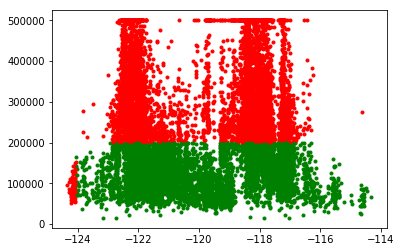

In [70]:
y_hat = log_reg.predict_proba(X)
# print(y_prime)

correct_predictions = 0
incorrect_predictions = 0
for index in range(0,len(y)):
    if index+1 % 1000 == 0:
        print(f"point {index} of {len(y)}")
    if y_hat[index][0] > y_hat[index][1]:
        prediction = 0
    else:
        prediction = 1
        
    if y[index] == prediction:
        correct_predictions += 1
        # plot the data
        plt.plot(X[index],yval[index],'g.')
    else:
        incorrect_predictions += 1
        # plot the data
        plt.plot(X[index],yval[index],'r.')
        
print(correct_predictions, incorrect_predictions)

# plt.plot(X, y_hat[:, 1], "g-")
# plt.plot(X, y_hat[:, 0], "b--")
# plt.ylabel('probability')
# plt.xlabel('longitude')

In [79]:
# the above graph is bad, but how bad is it? For this block, you will need to write
# some code to evaluate the quality of this logistic regression
from sklearn.metrics import mean_squared_error

y_predictions = []

sum_y_yhat = 0
for index in range(0,len(y)):
    if index+1 % 1000 == 0:
        print(f"point {index} of {len(y)}")
    if y_hat[index][0] > y_hat[index][1]:
        prediction = 0
    else:
        prediction = 1
    y_predictions.append(prediction)
    sum_y_yhat += (y[index] - prediction)
sum_y_yhat_squared = sum_y_yhat**2
rmse = (sum_y_yhat_squared/len(y))**.5
print(len(y), len(y_hat))
print(rmse, np.sqrt(mean_squared_error(y, y_predictions)))

20640 20640
59.853989411313364 0.6536643877273304


In [ ]:
# let's also try some linear regression on the data

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_features = PolynomialFeatures(degree=1,
                                         include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(X, yval)


In [ ]:
X_test = np.linspace(-124, -114, 1000)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.scatter(X, yval, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")


In [ ]:
# ohh, this looks bad, too! For this block, you will need to write
# some code to evaluate the quality of this linear regression (hint RMSE)


In [ ]:
# now I'd like you to try using the example code above to find at least
# one good combination for a logistic regression, and


In [ ]:
# at least two good linear regression fits


In [ ]:
# we might be able to do better looking at more than one feature

X = np.vstack((housing["latitude"], housing["longitude"]) ).T
y = ( housing["ocean_proximity"] == "INLAND" ).astype(np.int)
Y = housing["ocean_proximity"] 

#idx = np.arange(housing["ocean_proximity"]=="NEAR BAY")


In [ ]:
log_reg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1e5)
log_reg.fit(X,y)

In [ ]:
colors = "brmgc"
c2 = ['b','r','m','g','c']
classes = np.unique(housing["ocean_proximity"])
print(classes)


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=c2, edgecolors='k', cmap=plt.cm.Paired)


# Plot also the training points
for i, color in zip(classes, colors):
    idx = np.where(housing["ocean_proximity"] == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i, cmap=plt.cm.Paired, edgecolor='black', s=20)

    


In [ ]:
# how does this prediction do?

In [ ]:
# try doing some type of regression with an SGD regressor
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor
